<span style="font-family:Cambria; color:#c27767">
Optional: install if required
</span>

In [1]:
# Uncomment if required
# !pip install pandas --quiet

<span style="font-family:Cambria; color:#c27767">
Required packages:
</span>

In [2]:
# Standard library imports
import sys

# Third party imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from geopy.geocoders import Nominatim
import folium

# Local application/library specific imports
sys.path.append('functions')

from find_lat_long import find_lat_long
from find_state import find_state
from prepare_rain_data import prepare_rain_data

In [3]:
#import pandas as pd
#import numpy as np
#import plotly.express as px
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots

<span style="font-family:Cambria; color:#c27767">
Run below to lines for readability and style options:
</span>

In [4]:
# Pandas - run to display Data Frames properly

# To limit displayed rows
pd.options.display.max_rows = 50

#  To show all columns
pd.options.display.max_columns = 100

# To round floating numbers
pd.options.display.float_format = '{:,.2f}'.format
# To unset rounding float numbers
# pd.set_option("display.float_format", None)

<span style="font-family:Cambria; color:#c27767">

# 1. Import clean data
</span>

<span style="font-family:Cambria">
To run EDA I will not transform wind direction and location for now.
</span>

In [5]:
# run the custom function to load clean data
rain_data_clean = prepare_rain_data(
    wind_direction_transformation = False, 
    location_transformation = False
)

In [6]:
rain_data_clean

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,State
0,2007-11-01,Albury Airport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,New South Wales
1,2007-11-01,Badgerys Creek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,New South Wales
2,2007-11-01,Cobar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,New South Wales
3,2007-11-01,Coffs Harbour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,New South Wales
4,2007-11-01,Moree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,New South Wales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172720,2017-06-25,Launceston,1.80,12.80,0.00,NaN,NaN,NW,50.00,NNW,NNW,15.00,17.00,84.00,73.00,NaN,NaN,8.00,8.00,9.40,12.40,False,False,Tasmania
172721,2017-06-25,Alice Springs,9.60,NaN,0.00,NaN,NaN,NaN,NaN,WSW,E,6.00,17.00,36.00,19.00,"1,021.40","1,017.50",1.00,1.00,15.60,26.30,False,<NA>,Northern Territory
172722,2017-06-25,Darwin,19.30,NaN,0.00,5.00,NaN,NaN,NaN,E,NNW,13.00,17.00,68.00,45.00,"1,013.90","1,010.70",6.00,1.00,24.60,29.00,False,<NA>,Northern Territory
172723,2017-06-25,Katherine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,9.00,17.00,NaN,NaN,"1,014.90","1,011.70",NaN,NaN,NaN,NaN,<NA>,<NA>,Northern Territory


<span style="font-family:Cambria; color:#c27767">

# 2. Exploratory data analysis
</span>

<span style="font-family:Cambria">
I will try to examine all data columns - whatever catches my interest.
</span>

<span style="font-family:Cambria; color:#c27767">

## 1. Temperature
</span>

<span style="font-family:Cambria">
There are 4 variables related to temperature - min, max, 9 AM and 3 PM temperature each day for 49 different locations. To capture temperatures in different locations, I will create the same map I did in data preparation step (so I can see where such locations are) and a line plot to see which the temperature differences all over Australia.
</span>

In [7]:
# add detailed date columns - year, month
rain_data_clean['Year'] = rain_data_clean['Date'].dt.strftime('%Y')
rain_data_clean['Month'] = rain_data_clean['Date'].dt.strftime('%m')

Then I will plot temperatures for every location in different states in a different plot to see them all together. This will help to visualise how weather in different parts of Australia looks like.

In [8]:
sydney_temperature = rain_data_clean.loc[rain_data_clean['Location'] == 'Sydney']

<Axes: xlabel='Date', ylabel='Temp9am'>

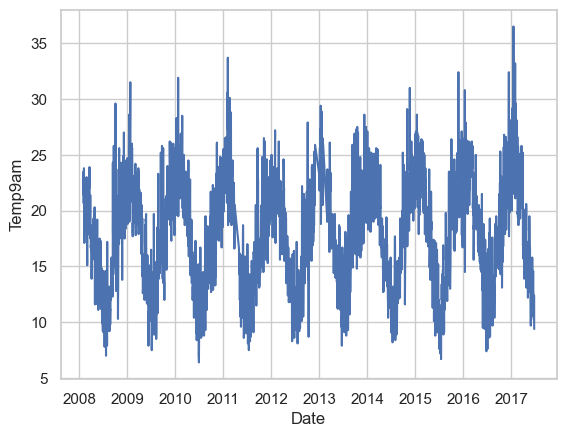

In [9]:
sns.set_theme(style="whitegrid")

sns.lineplot(data = sydney_temperature, x = 'Date', y = 'Temp9am')

<Axes: xlabel='Date', ylabel='Temp9am'>

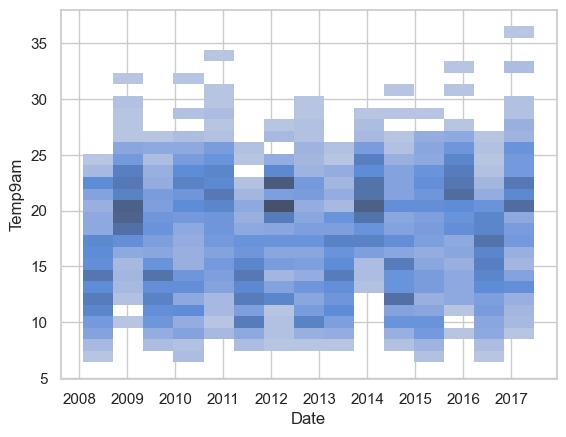

In [10]:
sns.set_theme(style="whitegrid")

sns.histplot(data = sydney_temperature, x = 'Date', y = 'Temp9am')

In [11]:
year_2014_rain_data = rain_data_clean.query("Year == '2014'")

In [31]:
year_2014_rain_data_south_wales = year_2014_rain_data.query("State == 'New South Wales'")

<Axes: xlabel='Year', ylabel='Temp9am'>

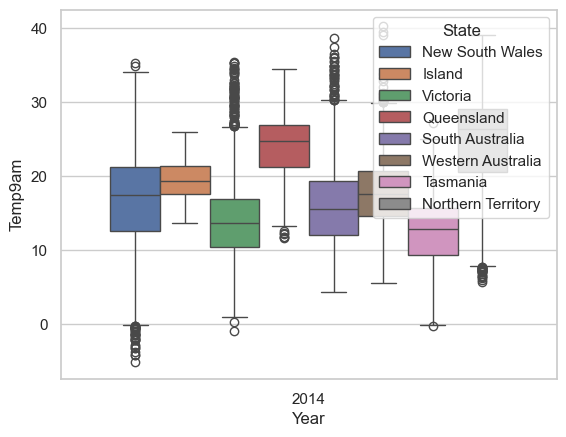

In [30]:
sns.boxplot(data=year_2014_rain_data, x='Year', y='Temp9am', hue = 'State')

<Axes: xlabel='Year', ylabel='Temp9am'>

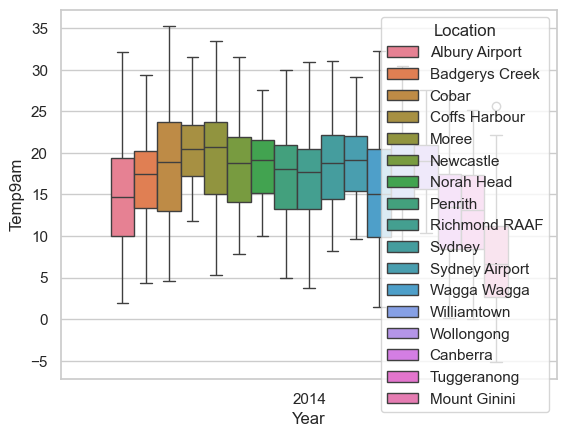

In [32]:
sns.boxplot(data=year_2014_rain_data_south_wales, x='Year', y='Temp9am', hue = 'Location')

Try box plot for every state - to see how locations differ within states.

Combine line plot with rainfall.

Create mean temperature and rainfall plots

Fix legends



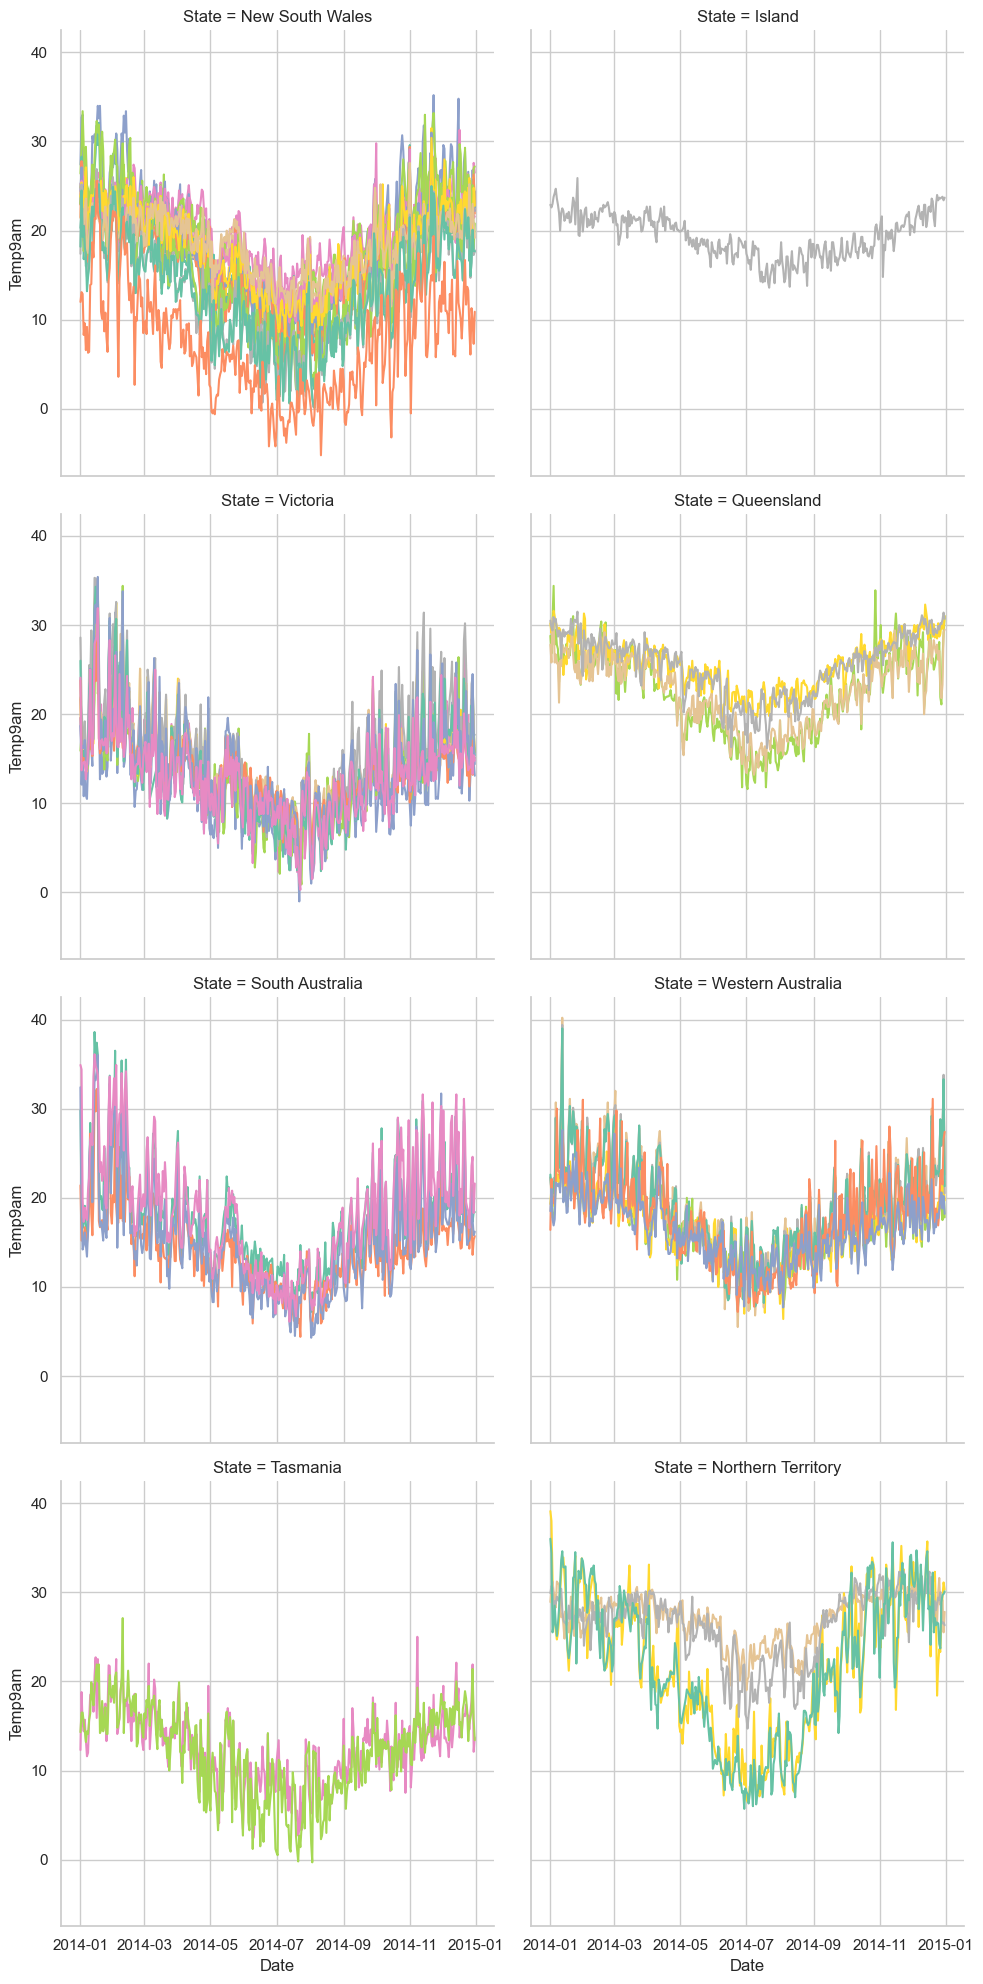

In [28]:
sns.relplot(
    data=year_2014_rain_data, x="Date", y="Temp9am",
    col="State", kind="line", col_wrap = 2, hue='Location', palette = "Set2",
    legend = False
)

From the above graph I can see that Tasmania state has lowest temperature in the country, while Northern Teritory has highest, all others being somewhat similar.

Let's combine temperature data with our most important variable - Rainfall.

In [14]:
#fig=plt.figure(figsize=(10,5))
#ax1 = fig.add_subplot(111)
#ax2 = ax1.twinx()
#sns.barplot(x='Date', y='Rainfall', data=sydney_temperature, color='blue',ax=ax1)

# only change this line
#sns.lineplot(x='Date', y='Temp9am',data=sydney_temperature,marker='s',color='orange',ax=ax2)

#plt.xticks(rotation=60)
#plt.show()

In [ ]:
fig=plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
sns.barplot(x='Bin',y='Frequency',data=myDF,color='blue',ax=ax1)

# only change this line
sns.lineplot(x=myDF.index, y='Cumulative',data=myDF,marker='s',color='orange',ax=ax2)

plt.xticks(rotation=60)
plt.show()

In [ ]:
sns.set_theme(style="whitegrid")

temperature_9am_mean = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

In [ ]:
import seaborn as sns

sns.set_theme(style="dark")
#flights = sns.load_dataset("flights")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=rain_data_clean,
    x="Year", y="Temp9am", col="State", hue="Location",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)


mean_temperature = rain_data_clean.rolling(7).mean()
sns.lineplot(data=data, palette="tab10", linewidth=2.5)



# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=rain_data_clean, x="Date", y="Temp9am",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Passengers")
g.tight_layout()

In [ ]:
fig = make_subplots(rows=1, cols=3)
fig.add_trace(
    go.Histogram(x=rain_data_clean["Location"], name="Location"),
    row=1, col=1)
fig.add_trace(
    go.Histogram(x=rain_data_clean["Location"], name="Location"),
    row=1, col=2)
fig.add_trace(
    go.Histogram(x=rain_data_clean["Location"], name="Location"),
    row=1, col=3)
# add axes
fig.update_layout(
    title_text="Histograms",
    xaxis1_title_text="x1 ",
    xaxis2_title_text="x2",
    xaxis3_title_text="x3",
    showlegend=False,
)
fig.show()

In [15]:
#location_rainfall = rain_data_clean.groupby("Location")["Rainfall"].sum()
#px.line(location_rainfall)

To do:

explore mean, median, quartiles

draw histograms and boxplots

check variance and standard deviation

explore covariance and correlation

scatter plot